### Name : N.Abishek
### Roll No: 215229101

### Lab 4 Image corpus creation and binary classification using DNN

#### Steps 1 to 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

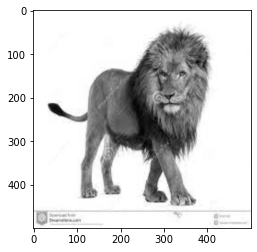

In [2]:
datadir ='dataset/'
categories =['lion','wolf']

for category in categories:
    path = os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [3]:
training_data = []
img_size=500

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()

In [4]:
print(len(training_data))

20


In [5]:
x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

##### Step 4

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense

In [8]:
model =Sequential()
model.add(Dense(8,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [9]:
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])

In [ ]:
hisotry=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)

Epoch 1/100
2/2 - 3s - loss: 0.2496 - binary_accuracy: 0.5333 - val_loss: 0.2559 - val_binary_accuracy: 0.4000 - 3s/epoch - 1s/step
Epoch 2/100
2/2 - 3s - loss: 0.2469 - binary_accuracy: 0.5333 - val_loss: 0.2467 - val_binary_accuracy: 0.5942 - 3s/epoch - 1s/step
Epoch 3/100
2/2 - 3s - loss: 0.2577 - binary_accuracy: 0.4589 - val_loss: 0.2428 - val_binary_accuracy: 0.5976 - 3s/epoch - 1s/step
Epoch 4/100
2/2 - 3s - loss: 0.2562 - binary_accuracy: 0.4679 - val_loss: 0.2427 - val_binary_accuracy: 0.5976 - 3s/epoch - 1s/step
Epoch 5/100
2/2 - 3s - loss: 0.2582 - binary_accuracy: 0.4673 - val_loss: 0.2429 - val_binary_accuracy: 0.5976 - 3s/epoch - 1s/step
Epoch 6/100
2/2 - 3s - loss: 0.2574 - binary_accuracy: 0.4671 - val_loss: 0.2441 - val_binary_accuracy: 0.5969 - 3s/epoch - 1s/step
Epoch 7/100
2/2 - 3s - loss: 0.2548 - binary_accuracy: 0.4628 - val_loss: 0.2493 - val_binary_accuracy: 0.5351 - 3s/epoch - 1s/step
Epoch 8/100
2/2 - 3s - loss: 0.2487 - binary_accuracy: 0.6239 - val_loss: 0.

In [11]:
model.evaluate(x_train,y_train)

1/1 [==============================] - 0s 229ms/step - loss: 0.2502 - binary_accuracy: 0.5333


[0.2502082884311676, 0.533332884311676]

##### Step 5

In [12]:
# model 1
model =Sequential()
model.add(Dense(16,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 1s - loss: 0.4466 - binary_accuracy: 0.5333 - val_loss: 0.5762 - val_binary_accuracy: 0.4002 - 1s/epoch - 595ms/step
Epoch 2/100
2/2 - 1s - loss: 0.4426 - binary_accuracy: 0.5333 - val_loss: 0.5684 - val_binary_accuracy: 0.4002 - 561ms/epoch - 280ms/step
Epoch 3/100
2/2 - 1s - loss: 0.4367 - binary_accuracy: 0.5333 - val_loss: 0.5565 - val_binary_accuracy: 0.4002 - 575ms/epoch - 288ms/step
Epoch 4/100
2/2 - 1s - loss: 0.4281 - binary_accuracy: 0.5333 - val_loss: 0.5390 - val_binary_accuracy: 0.4002 - 597ms/epoch - 298ms/step
Epoch 5/100
2/2 - 1s - loss: 0.4066 - binary_accuracy: 0.5333 - val_loss: 0.5127 - val_binary_accuracy: 0.4008 - 597ms/epoch - 298ms/step
Epoch 6/100
2/2 - 1s - loss: 0.3941 - binary_accuracy: 0.5333 - val_loss: 0.4721 - val_binary_accuracy: 0.4008 - 573ms/epoch - 287ms/step
Epoch 7/100
2/2 - 1s - loss: 0.3489 - binary_accuracy: 0.5334 - val_loss: 0.4009 - val_binary_accuracy: 0.4013 - 610ms/epoch - 305ms/step
Epoch 8/100
2/2 - 1s - loss: 0.3200 -

In [13]:
model.evaluate(x_train,y_train)

1/1 [==============================] - 0s 283ms/step - loss: 0.2498 - binary_accuracy: 0.5190


[0.2498386651277542, 0.5189908742904663]

In [14]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 86ms/step - loss: 0.2507 - binary_accuracy: 0.4369


[0.25071069598197937, 0.43686243891716003]

In [15]:
# model 2
model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 1s - loss: 0.5149 - binary_accuracy: 0.4667 - val_loss: 0.3878 - val_binary_accuracy: 0.5998 - 1s/epoch - 675ms/step
Epoch 2/100
2/2 - 1s - loss: 0.5013 - binary_accuracy: 0.4667 - val_loss: 0.3792 - val_binary_accuracy: 0.5998 - 821ms/epoch - 411ms/step
Epoch 3/100
2/2 - 1s - loss: 0.4888 - binary_accuracy: 0.4667 - val_loss: 0.3611 - val_binary_accuracy: 0.5998 - 855ms/epoch - 427ms/step
Epoch 4/100
2/2 - 1s - loss: 0.4616 - binary_accuracy: 0.4667 - val_loss: 0.3179 - val_binary_accuracy: 0.5992 - 823ms/epoch - 411ms/step
Epoch 5/100
2/2 - 1s - loss: 0.3704 - binary_accuracy: 0.4667 - val_loss: 0.2432 - val_binary_accuracy: 0.5962 - 849ms/epoch - 424ms/step
Epoch 6/100
2/2 - 1s - loss: 0.2520 - binary_accuracy: 0.5333 - val_loss: 0.3984 - val_binary_accuracy: 0.4000 - 833ms/epoch - 416ms/step
Epoch 7/100
2/2 - 1s - loss: 0.3153 - binary_accuracy: 0.5333 - val_loss: 0.4218 - val_binary_accuracy: 0.4000 - 844ms/epoch - 422ms/step
Epoch 8/100
2/2 - 1s - loss: 0.3296 -

In [16]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 153ms/step - loss: 0.2591 - binary_accuracy: 0.4000


[0.25909194350242615, 0.40000057220458984]

In [17]:
#model 3

model =Sequential()
model.add(Dense(64,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 2s - loss: 0.5282 - binary_accuracy: 0.4667 - val_loss: 0.3965 - val_binary_accuracy: 0.5998 - 2s/epoch - 1s/step
Epoch 2/100
2/2 - 1s - loss: 0.5257 - binary_accuracy: 0.4667 - val_loss: 0.3958 - val_binary_accuracy: 0.5998 - 1s/epoch - 721ms/step
Epoch 3/100
2/2 - 1s - loss: 0.5239 - binary_accuracy: 0.4667 - val_loss: 0.3947 - val_binary_accuracy: 0.5998 - 1s/epoch - 712ms/step
Epoch 4/100
2/2 - 1s - loss: 0.5211 - binary_accuracy: 0.4667 - val_loss: 0.3928 - val_binary_accuracy: 0.5998 - 1s/epoch - 716ms/step
Epoch 5/100
2/2 - 1s - loss: 0.5170 - binary_accuracy: 0.4667 - val_loss: 0.3895 - val_binary_accuracy: 0.5998 - 1s/epoch - 707ms/step
Epoch 6/100
2/2 - 1s - loss: 0.5090 - binary_accuracy: 0.4667 - val_loss: 0.3831 - val_binary_accuracy: 0.5998 - 1s/epoch - 708ms/step
Epoch 7/100
2/2 - 1s - loss: 0.4983 - binary_accuracy: 0.4667 - val_loss: 0.3704 - val_binary_accuracy: 0.5992 - 1s/epoch - 699ms/step
Epoch 8/100
2/2 - 1s - loss: 0.4739 - binary_accuracy: 0.4

In [18]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 225ms/step - loss: 0.2465 - binary_accuracy: 0.5454


[0.2465304434299469, 0.5453556776046753]

In [20]:
# model 4
model =Sequential()
model.add(Dense(128,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 3s - loss: 0.4656 - binary_accuracy: 0.5333 - val_loss: 0.5960 - val_binary_accuracy: 0.4002 - 3s/epoch - 2s/step
Epoch 2/100
2/2 - 3s - loss: 0.4648 - binary_accuracy: 0.5333 - val_loss: 0.5956 - val_binary_accuracy: 0.4002 - 3s/epoch - 1s/step
Epoch 3/100
2/2 - 3s - loss: 0.4640 - binary_accuracy: 0.5333 - val_loss: 0.5949 - val_binary_accuracy: 0.4002 - 3s/epoch - 1s/step
Epoch 4/100
2/2 - 3s - loss: 0.4626 - binary_accuracy: 0.5333 - val_loss: 0.5936 - val_binary_accuracy: 0.4002 - 3s/epoch - 1s/step
Epoch 5/100
2/2 - 3s - loss: 0.4609 - binary_accuracy: 0.5333 - val_loss: 0.5905 - val_binary_accuracy: 0.4002 - 3s/epoch - 1s/step
Epoch 6/100
2/2 - 3s - loss: 0.4550 - binary_accuracy: 0.5333 - val_loss: 0.5819 - val_binary_accuracy: 0.4008 - 3s/epoch - 1s/step
Epoch 7/100
2/2 - 3s - loss: 0.4480 - binary_accuracy: 0.5333 - val_loss: 0.5537 - val_binary_accuracy: 0.4011 - 3s/epoch - 1s/step
Epoch 8/100
2/2 - 3s - loss: 0.4197 - binary_accuracy: 0.5333 - val_loss: 0.

In [21]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 407ms/step - loss: 0.2824 - binary_accuracy: 0.4013


[0.2823508381843567, 0.40127959847450256]

In [22]:
#size 100
training_data = []
img_size=100

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(16,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 1s - loss: 0.5281 - binary_accuracy: 0.4667 - val_loss: 0.3966 - val_binary_accuracy: 0.5998 - 603ms/epoch - 302ms/step
Epoch 2/100
2/2 - 0s - loss: 0.5261 - binary_accuracy: 0.4667 - val_loss: 0.3963 - val_binary_accuracy: 0.5998 - 62ms/epoch - 31ms/step
Epoch 3/100
2/2 - 0s - loss: 0.5251 - binary_accuracy: 0.4667 - val_loss: 0.3958 - val_binary_accuracy: 0.5998 - 60ms/epoch - 30ms/step
Epoch 4/100
2/2 - 0s - loss: 0.5233 - binary_accuracy: 0.4667 - val_loss: 0.3951 - val_binary_accuracy: 0.5998 - 57ms/epoch - 29ms/step
Epoch 5/100
2/2 - 0s - loss: 0.5226 - binary_accuracy: 0.4667 - val_loss: 0.3941 - val_binary_accuracy: 0.5998 - 56ms/epoch - 28ms/step
Epoch 6/100
2/2 - 0s - loss: 0.5192 - binary_accuracy: 0.4667 - val_loss: 0.3927 - val_binary_accuracy: 0.5998 - 66ms/epoch - 33ms/step
Epoch 7/100
2/2 - 0s - loss: 0.5174 - binary_accuracy: 0.4667 - val_loss: 0.3905 - val_binary_accuracy: 0.5998 - 57ms/epoch - 29ms/step
Epoch 8/100
2/2 - 0s - loss: 0.5114 - binary_a

In [23]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 22ms/step - loss: 0.2456 - binary_accuracy: 0.5617


[0.24556343257427216, 0.5616834163665771]

In [24]:
model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 1s - loss: 0.4643 - binary_accuracy: 0.5333 - val_loss: 0.5956 - val_binary_accuracy: 0.4002 - 610ms/epoch - 305ms/step
Epoch 2/100
2/2 - 0s - loss: 0.4638 - binary_accuracy: 0.5333 - val_loss: 0.5953 - val_binary_accuracy: 0.4002 - 73ms/epoch - 36ms/step
Epoch 3/100
2/2 - 0s - loss: 0.4636 - binary_accuracy: 0.5333 - val_loss: 0.5949 - val_binary_accuracy: 0.4002 - 68ms/epoch - 34ms/step
Epoch 4/100
2/2 - 0s - loss: 0.4628 - binary_accuracy: 0.5333 - val_loss: 0.5945 - val_binary_accuracy: 0.4002 - 67ms/epoch - 34ms/step
Epoch 5/100
2/2 - 0s - loss: 0.4622 - binary_accuracy: 0.5333 - val_loss: 0.5939 - val_binary_accuracy: 0.4002 - 74ms/epoch - 37ms/step
Epoch 6/100
2/2 - 0s - loss: 0.4614 - binary_accuracy: 0.5333 - val_loss: 0.5930 - val_binary_accuracy: 0.4002 - 72ms/epoch - 36ms/step
Epoch 7/100
2/2 - 0s - loss: 0.4598 - binary_accuracy: 0.5333 - val_loss: 0.5918 - val_binary_accuracy: 0.4002 - 74ms/epoch - 37ms/step
Epoch 8/100
2/2 - 0s - loss: 0.4591 - binary_a

In [25]:
model =Sequential()
model.add(Dense(64,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 1s - loss: 0.5169 - binary_accuracy: 0.4667 - val_loss: 0.3901 - val_binary_accuracy: 0.5998 - 648ms/epoch - 324ms/step
Epoch 2/100
2/2 - 0s - loss: 0.5113 - binary_accuracy: 0.4667 - val_loss: 0.3819 - val_binary_accuracy: 0.5998 - 97ms/epoch - 49ms/step
Epoch 3/100
2/2 - 0s - loss: 0.4810 - binary_accuracy: 0.4667 - val_loss: 0.3663 - val_binary_accuracy: 0.5998 - 99ms/epoch - 50ms/step
Epoch 4/100
2/2 - 0s - loss: 0.4688 - binary_accuracy: 0.4667 - val_loss: 0.3328 - val_binary_accuracy: 0.5992 - 110ms/epoch - 55ms/step
Epoch 5/100
2/2 - 0s - loss: 0.3996 - binary_accuracy: 0.4667 - val_loss: 0.2483 - val_binary_accuracy: 0.5977 - 94ms/epoch - 47ms/step
Epoch 6/100
2/2 - 0s - loss: 0.3192 - binary_accuracy: 0.2681 - val_loss: 0.3140 - val_binary_accuracy: 0.4000 - 102ms/epoch - 51ms/step
Epoch 7/100
2/2 - 0s - loss: 0.2653 - binary_accuracy: 0.5333 - val_loss: 0.3225 - val_binary_accuracy: 0.4000 - 102ms/epoch - 51ms/step
Epoch 8/100
2/2 - 0s - loss: 0.2675 - binar

In [26]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 27ms/step - loss: 0.2857 - binary_accuracy: 0.4000


[0.28574061393737793, 0.40000078082084656]

In [27]:
#size 50

training_data = []
img_size=50

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(16,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 1s - loss: 0.4462 - binary_accuracy: 0.5333 - val_loss: 0.5768 - val_binary_accuracy: 0.4001 - 571ms/epoch - 285ms/step
Epoch 2/100
2/2 - 0s - loss: 0.4447 - binary_accuracy: 0.5333 - val_loss: 0.5732 - val_binary_accuracy: 0.4001 - 39ms/epoch - 20ms/step
Epoch 3/100
2/2 - 0s - loss: 0.4393 - binary_accuracy: 0.5333 - val_loss: 0.5687 - val_binary_accuracy: 0.4001 - 47ms/epoch - 24ms/step
Epoch 4/100
2/2 - 0s - loss: 0.4359 - binary_accuracy: 0.5333 - val_loss: 0.5632 - val_binary_accuracy: 0.4001 - 35ms/epoch - 18ms/step
Epoch 5/100
2/2 - 0s - loss: 0.4345 - binary_accuracy: 0.5333 - val_loss: 0.5563 - val_binary_accuracy: 0.4001 - 39ms/epoch - 20ms/step
Epoch 6/100
2/2 - 0s - loss: 0.4336 - binary_accuracy: 0.5333 - val_loss: 0.5479 - val_binary_accuracy: 0.4001 - 37ms/epoch - 19ms/step
Epoch 7/100
2/2 - 0s - loss: 0.4215 - binary_accuracy: 0.5333 - val_loss: 0.5373 - val_binary_accuracy: 0.4001 - 39ms/epoch - 19ms/step
Epoch 8/100
2/2 - 0s - loss: 0.4132 - binary_a

In [28]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 26ms/step - loss: 0.2500 - binary_accuracy: 0.5106


[0.24999621510505676, 0.5105759501457214]

In [29]:
model =Sequential()
model.add(Dense(16,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 1s - loss: 0.4665 - binary_accuracy: 0.5333 - val_loss: 0.5978 - val_binary_accuracy: 0.4001 - 730ms/epoch - 365ms/step
Epoch 2/100
2/2 - 0s - loss: 0.4664 - binary_accuracy: 0.5333 - val_loss: 0.5978 - val_binary_accuracy: 0.4001 - 39ms/epoch - 19ms/step
Epoch 3/100
2/2 - 0s - loss: 0.4665 - binary_accuracy: 0.5333 - val_loss: 0.5977 - val_binary_accuracy: 0.4001 - 40ms/epoch - 20ms/step
Epoch 4/100
2/2 - 0s - loss: 0.4664 - binary_accuracy: 0.5333 - val_loss: 0.5977 - val_binary_accuracy: 0.4001 - 40ms/epoch - 20ms/step
Epoch 5/100
2/2 - 0s - loss: 0.4665 - binary_accuracy: 0.5333 - val_loss: 0.5977 - val_binary_accuracy: 0.4001 - 36ms/epoch - 18ms/step
Epoch 6/100
2/2 - 0s - loss: 0.4665 - binary_accuracy: 0.5333 - val_loss: 0.5977 - val_binary_accuracy: 0.4001 - 42ms/epoch - 21ms/step
Epoch 7/100
2/2 - 0s - loss: 0.4665 - binary_accuracy: 0.5333 - val_loss: 0.5976 - val_binary_accuracy: 0.4001 - 40ms/epoch - 20ms/step
Epoch 8/100
2/2 - 0s - loss: 0.4665 - binary_a

In [30]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 19ms/step - loss: 0.2592 - binary_accuracy: 0.4734


[0.2591794431209564, 0.4733602702617645]

In [31]:
model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 1s - loss: 0.5300 - binary_accuracy: 0.4667 - val_loss: 0.3975 - val_binary_accuracy: 0.5999 - 566ms/epoch - 283ms/step
Epoch 2/100
2/2 - 0s - loss: 0.5300 - binary_accuracy: 0.4667 - val_loss: 0.3973 - val_binary_accuracy: 0.5999 - 46ms/epoch - 23ms/step
Epoch 3/100
2/2 - 0s - loss: 0.5293 - binary_accuracy: 0.4667 - val_loss: 0.3970 - val_binary_accuracy: 0.5999 - 45ms/epoch - 23ms/step
Epoch 4/100
2/2 - 0s - loss: 0.5275 - binary_accuracy: 0.4667 - val_loss: 0.3966 - val_binary_accuracy: 0.5999 - 48ms/epoch - 24ms/step
Epoch 5/100
2/2 - 0s - loss: 0.5262 - binary_accuracy: 0.4667 - val_loss: 0.3960 - val_binary_accuracy: 0.5999 - 45ms/epoch - 22ms/step
Epoch 6/100
2/2 - 0s - loss: 0.5244 - binary_accuracy: 0.4667 - val_loss: 0.3952 - val_binary_accuracy: 0.5999 - 45ms/epoch - 22ms/step
Epoch 7/100
2/2 - 0s - loss: 0.5229 - binary_accuracy: 0.4667 - val_loss: 0.3939 - val_binary_accuracy: 0.5999 - 47ms/epoch - 24ms/step
Epoch 8/100
2/2 - 0s - loss: 0.5183 - binary_a

In [32]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 27ms/step - loss: 0.2684 - binary_accuracy: 0.4000


[0.26843929290771484, 0.40000078082084656]

In [33]:
model =Sequential()
model.add(Dense(64,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 1s - loss: 0.3222 - binary_accuracy: 0.4667 - val_loss: 0.3310 - val_binary_accuracy: 0.4000 - 575ms/epoch - 288ms/step
Epoch 2/100
2/2 - 0s - loss: 0.2649 - binary_accuracy: 0.5333 - val_loss: 0.4060 - val_binary_accuracy: 0.4000 - 55ms/epoch - 28ms/step
Epoch 3/100
2/2 - 0s - loss: 0.3265 - binary_accuracy: 0.5333 - val_loss: 0.4241 - val_binary_accuracy: 0.4000 - 50ms/epoch - 25ms/step
Epoch 4/100
2/2 - 0s - loss: 0.3298 - binary_accuracy: 0.5333 - val_loss: 0.3654 - val_binary_accuracy: 0.4000 - 50ms/epoch - 25ms/step
Epoch 5/100
2/2 - 0s - loss: 0.2854 - binary_accuracy: 0.5333 - val_loss: 0.2623 - val_binary_accuracy: 0.4000 - 53ms/epoch - 26ms/step
Epoch 6/100
2/2 - 0s - loss: 0.2576 - binary_accuracy: 0.4667 - val_loss: 0.2448 - val_binary_accuracy: 0.5988 - 50ms/epoch - 25ms/step
Epoch 7/100
2/2 - 0s - loss: 0.2756 - binary_accuracy: 0.4667 - val_loss: 0.2424 - val_binary_accuracy: 0.5984 - 51ms/epoch - 25ms/step
Epoch 8/100
2/2 - 0s - loss: 0.2637 - binary_a

In [34]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 22ms/step - loss: 0.2441 - binary_accuracy: 0.5935


[0.2441267967224121, 0.5935030579566956]

In [35]:
#size 25

training_data = []
img_size=25


def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(16,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 1s - loss: 0.5122 - binary_accuracy: 0.4667 - val_loss: 0.3849 - val_binary_accuracy: 0.6000 - 573ms/epoch - 286ms/step
Epoch 2/100
2/2 - 0s - loss: 0.5046 - binary_accuracy: 0.4667 - val_loss: 0.3760 - val_binary_accuracy: 0.6000 - 27ms/epoch - 13ms/step
Epoch 3/100
2/2 - 0s - loss: 0.4885 - binary_accuracy: 0.4667 - val_loss: 0.3600 - val_binary_accuracy: 0.6000 - 35ms/epoch - 18ms/step
Epoch 4/100
2/2 - 0s - loss: 0.4574 - binary_accuracy: 0.4667 - val_loss: 0.3332 - val_binary_accuracy: 0.5992 - 34ms/epoch - 17ms/step
Epoch 5/100
2/2 - 0s - loss: 0.4206 - binary_accuracy: 0.4666 - val_loss: 0.2813 - val_binary_accuracy: 0.5987 - 30ms/epoch - 15ms/step
Epoch 6/100
2/2 - 0s - loss: 0.3256 - binary_accuracy: 0.4667 - val_loss: 0.2542 - val_binary_accuracy: 0.4000 - 37ms/epoch - 18ms/step
Epoch 7/100
2/2 - 0s - loss: 0.2495 - binary_accuracy: 0.5333 - val_loss: 0.3629 - val_binary_accuracy: 0.4000 - 35ms/epoch - 17ms/step
Epoch 8/100
2/2 - 0s - loss: 0.2932 - binary_a

In [36]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 25ms/step - loss: 0.2452 - binary_accuracy: 0.5784


[0.24517285823822021, 0.578367292881012]

In [37]:
model =Sequential()
model.add(Dense(16,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 1s - loss: 0.3519 - binary_accuracy: 0.5333 - val_loss: 0.3856 - val_binary_accuracy: 0.4000 - 540ms/epoch - 270ms/step
Epoch 2/100
2/2 - 0s - loss: 0.2858 - binary_accuracy: 0.5333 - val_loss: 0.2710 - val_binary_accuracy: 0.4017 - 31ms/epoch - 16ms/step
Epoch 3/100
2/2 - 0s - loss: 0.2438 - binary_accuracy: 0.5999 - val_loss: 0.2443 - val_binary_accuracy: 0.6000 - 29ms/epoch - 15ms/step
Epoch 4/100
2/2 - 0s - loss: 0.2726 - binary_accuracy: 0.4667 - val_loss: 0.2518 - val_binary_accuracy: 0.6000 - 31ms/epoch - 16ms/step
Epoch 5/100
2/2 - 0s - loss: 0.2849 - binary_accuracy: 0.4667 - val_loss: 0.2464 - val_binary_accuracy: 0.6000 - 34ms/epoch - 17ms/step
Epoch 6/100
2/2 - 0s - loss: 0.2717 - binary_accuracy: 0.4667 - val_loss: 0.2437 - val_binary_accuracy: 0.6000 - 25ms/epoch - 12ms/step
Epoch 7/100
2/2 - 0s - loss: 0.2578 - binary_accuracy: 0.4001 - val_loss: 0.2707 - val_binary_accuracy: 0.4017 - 31ms/epoch - 15ms/step
Epoch 8/100
2/2 - 0s - loss: 0.2601 - binary_a

In [38]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 29ms/step - loss: 0.2504 - binary_accuracy: 0.4514


[0.2504050135612488, 0.4513925313949585]

In [39]:
model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 1s - loss: 0.4765 - binary_accuracy: 0.4667 - val_loss: 0.3420 - val_binary_accuracy: 0.6000 - 529ms/epoch - 264ms/step
Epoch 2/100
2/2 - 0s - loss: 0.4133 - binary_accuracy: 0.4667 - val_loss: 0.3000 - val_binary_accuracy: 0.5992 - 25ms/epoch - 13ms/step
Epoch 3/100
2/2 - 0s - loss: 0.3799 - binary_accuracy: 0.4667 - val_loss: 0.2461 - val_binary_accuracy: 0.5983 - 26ms/epoch - 13ms/step
Epoch 4/100
2/2 - 0s - loss: 0.2743 - binary_accuracy: 0.4001 - val_loss: 0.2836 - val_binary_accuracy: 0.4000 - 25ms/epoch - 12ms/step
Epoch 5/100
2/2 - 0s - loss: 0.2636 - binary_accuracy: 0.5333 - val_loss: 0.3326 - val_binary_accuracy: 0.4000 - 23ms/epoch - 12ms/step
Epoch 6/100
2/2 - 0s - loss: 0.2752 - binary_accuracy: 0.5333 - val_loss: 0.3162 - val_binary_accuracy: 0.4000 - 26ms/epoch - 13ms/step
Epoch 7/100
2/2 - 0s - loss: 0.2630 - binary_accuracy: 0.5333 - val_loss: 0.2768 - val_binary_accuracy: 0.4000 - 24ms/epoch - 12ms/step
Epoch 8/100
2/2 - 0s - loss: 0.2489 - binary_a

In [40]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 18ms/step - loss: 0.2915 - binary_accuracy: 0.4000


[0.29146015644073486, 0.40000078082084656]

In [41]:
model =Sequential()
model.add(Dense(64,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 1s - loss: 0.5236 - binary_accuracy: 0.4667 - val_loss: 0.3942 - val_binary_accuracy: 0.6000 - 521ms/epoch - 260ms/step
Epoch 2/100
2/2 - 0s - loss: 0.5200 - binary_accuracy: 0.4667 - val_loss: 0.3897 - val_binary_accuracy: 0.6000 - 27ms/epoch - 13ms/step
Epoch 3/100
2/2 - 0s - loss: 0.5098 - binary_accuracy: 0.4667 - val_loss: 0.3781 - val_binary_accuracy: 0.6000 - 27ms/epoch - 14ms/step
Epoch 4/100
2/2 - 0s - loss: 0.4914 - binary_accuracy: 0.4667 - val_loss: 0.3479 - val_binary_accuracy: 0.5992 - 28ms/epoch - 14ms/step
Epoch 5/100
2/2 - 0s - loss: 0.4427 - binary_accuracy: 0.4667 - val_loss: 0.2788 - val_binary_accuracy: 0.5983 - 29ms/epoch - 14ms/step
Epoch 6/100
2/2 - 0s - loss: 0.3000 - binary_accuracy: 0.4723 - val_loss: 0.3607 - val_binary_accuracy: 0.4000 - 26ms/epoch - 13ms/step
Epoch 7/100
2/2 - 0s - loss: 0.2829 - binary_accuracy: 0.5333 - val_loss: 0.4183 - val_binary_accuracy: 0.4000 - 27ms/epoch - 14ms/step
Epoch 8/100
2/2 - 0s - loss: 0.3209 - binary_a

In [42]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 30ms/step - loss: 0.2982 - binary_accuracy: 0.4000


[0.2982402443885803, 0.40000078082084656]

In [43]:
model =Sequential()
model.add(Dense(128,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 1s - loss: 0.4261 - binary_accuracy: 0.5333 - val_loss: 0.4971 - val_binary_accuracy: 0.4000 - 539ms/epoch - 270ms/step
Epoch 2/100
2/2 - 0s - loss: 0.3318 - binary_accuracy: 0.5333 - val_loss: 0.2481 - val_binary_accuracy: 0.6000 - 35ms/epoch - 17ms/step
Epoch 3/100
2/2 - 0s - loss: 0.3231 - binary_accuracy: 0.4667 - val_loss: 0.2941 - val_binary_accuracy: 0.6000 - 36ms/epoch - 18ms/step
Epoch 4/100
2/2 - 0s - loss: 0.3524 - binary_accuracy: 0.4667 - val_loss: 0.2671 - val_binary_accuracy: 0.6000 - 34ms/epoch - 17ms/step
Epoch 5/100
2/2 - 0s - loss: 0.3084 - binary_accuracy: 0.4667 - val_loss: 0.2705 - val_binary_accuracy: 0.4026 - 32ms/epoch - 16ms/step
Epoch 6/100
2/2 - 0s - loss: 0.2724 - binary_accuracy: 0.5326 - val_loss: 0.3526 - val_binary_accuracy: 0.4013 - 33ms/epoch - 17ms/step
Epoch 7/100
2/2 - 0s - loss: 0.2784 - binary_accuracy: 0.5333 - val_loss: 0.3151 - val_binary_accuracy: 0.4015 - 33ms/epoch - 17ms/step
Epoch 8/100
2/2 - 0s - loss: 0.2795 - binary_a

In [44]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 20ms/step - loss: 0.2444 - binary_accuracy: 0.5972


[0.24444076418876648, 0.5971829891204834]

In [45]:
#size 25

training_data = []
img_size=10


def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(16,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 1s - loss: 0.4664 - binary_accuracy: 0.5333 - val_loss: 0.5976 - val_binary_accuracy: 0.4000 - 729ms/epoch - 364ms/step
Epoch 2/100
2/2 - 0s - loss: 0.4662 - binary_accuracy: 0.5333 - val_loss: 0.5975 - val_binary_accuracy: 0.4000 - 19ms/epoch - 9ms/step
Epoch 3/100
2/2 - 0s - loss: 0.4662 - binary_accuracy: 0.5333 - val_loss: 0.5975 - val_binary_accuracy: 0.4000 - 23ms/epoch - 12ms/step
Epoch 4/100
2/2 - 0s - loss: 0.4663 - binary_accuracy: 0.5333 - val_loss: 0.5974 - val_binary_accuracy: 0.4000 - 24ms/epoch - 12ms/step
Epoch 5/100
2/2 - 0s - loss: 0.4661 - binary_accuracy: 0.5333 - val_loss: 0.5974 - val_binary_accuracy: 0.4000 - 22ms/epoch - 11ms/step
Epoch 6/100
2/2 - 0s - loss: 0.4663 - binary_accuracy: 0.5333 - val_loss: 0.5973 - val_binary_accuracy: 0.4000 - 25ms/epoch - 13ms/step
Epoch 7/100
2/2 - 0s - loss: 0.4661 - binary_accuracy: 0.5333 - val_loss: 0.5972 - val_binary_accuracy: 0.4000 - 22ms/epoch - 11ms/step
Epoch 8/100
2/2 - 0s - loss: 0.4662 - binary_ac

In [46]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 18ms/step - loss: 0.2691 - binary_accuracy: 0.4200


[0.2690955698490143, 0.4199999272823334]

#### Step 5 part II

In [47]:
#2 layer

training_data = []
img_size=500

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 2s - loss: 0.5311 - binary_accuracy: 0.4667 - val_loss: 0.3978 - val_binary_accuracy: 0.5998 - 2s/epoch - 955ms/step
Epoch 2/100
2/2 - 1s - loss: 0.5305 - binary_accuracy: 0.4667 - val_loss: 0.3976 - val_binary_accuracy: 0.5998 - 1s/epoch - 649ms/step
Epoch 3/100
2/2 - 1s - loss: 0.5299 - binary_accuracy: 0.4667 - val_loss: 0.3973 - val_binary_accuracy: 0.5998 - 1s/epoch - 627ms/step
Epoch 4/100
2/2 - 1s - loss: 0.5289 - binary_accuracy: 0.4667 - val_loss: 0.3968 - val_binary_accuracy: 0.5998 - 1s/epoch - 632ms/step
Epoch 5/100
2/2 - 1s - loss: 0.5275 - binary_accuracy: 0.4667 - val_loss: 0.3961 - val_binary_accuracy: 0.5998 - 1s/epoch - 626ms/step
Epoch 6/100
2/2 - 1s - loss: 0.5245 - binary_accuracy: 0.4667 - val_loss: 0.3949 - val_binary_accuracy: 0.5998 - 1s/epoch - 640ms/step
Epoch 7/100
2/2 - 1s - loss: 0.5220 - binary_accuracy: 0.4667 - val_loss: 0.3927 - val_binary_accuracy: 0.5998 - 1s/epoch - 658ms/step
Epoch 8/100
2/2 - 1s - loss: 0.5159 - binary_accuracy: 

In [48]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 280ms/step - loss: 0.2542 - binary_accuracy: 0.4000


[0.2541525065898895, 0.40000057220458984]

In [49]:
#3 layer

training_data = []
img_size=500

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 4s - loss: 0.3130 - binary_accuracy: 0.5333 - val_loss: 0.2478 - val_binary_accuracy: 0.6000 - 4s/epoch - 2s/step
Epoch 2/100
2/2 - 2s - loss: 0.3205 - binary_accuracy: 0.4667 - val_loss: 0.2708 - val_binary_accuracy: 0.6000 - 2s/epoch - 1s/step
Epoch 3/100
2/2 - 3s - loss: 0.3020 - binary_accuracy: 0.4667 - val_loss: 0.2595 - val_binary_accuracy: 0.4022 - 3s/epoch - 1s/step
Epoch 4/100
2/2 - 3s - loss: 0.2502 - binary_accuracy: 0.5333 - val_loss: 0.3729 - val_binary_accuracy: 0.4002 - 3s/epoch - 1s/step
Epoch 5/100
2/2 - 2s - loss: 0.2986 - binary_accuracy: 0.5333 - val_loss: 0.3872 - val_binary_accuracy: 0.4002 - 2s/epoch - 1s/step
Epoch 6/100
2/2 - 2s - loss: 0.3075 - binary_accuracy: 0.5333 - val_loss: 0.3379 - val_binary_accuracy: 0.4002 - 2s/epoch - 1s/step
Epoch 7/100
2/2 - 3s - loss: 0.2752 - binary_accuracy: 0.5333 - val_loss: 0.2631 - val_binary_accuracy: 0.4017 - 3s/epoch - 1s/step
Epoch 8/100
2/2 - 2s - loss: 0.2545 - binary_accuracy: 0.4667 - val_loss: 0.

In [50]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 356ms/step - loss: 0.2439 - binary_accuracy: 0.5951


[0.24387605488300323, 0.5951387286186218]

In [51]:
#4 layer

training_data = []
img_size=500

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 5s - loss: 0.4996 - binary_accuracy: 0.4667 - val_loss: 0.3610 - val_binary_accuracy: 0.5998 - 5s/epoch - 2s/step
Epoch 2/100
2/2 - 3s - loss: 0.4600 - binary_accuracy: 0.4667 - val_loss: 0.3022 - val_binary_accuracy: 0.5992 - 3s/epoch - 2s/step
Epoch 3/100
2/2 - 3s - loss: 0.3652 - binary_accuracy: 0.4666 - val_loss: 0.2933 - val_binary_accuracy: 0.4000 - 3s/epoch - 2s/step
Epoch 4/100
2/2 - 3s - loss: 0.2651 - binary_accuracy: 0.5333 - val_loss: 0.3193 - val_binary_accuracy: 0.4000 - 3s/epoch - 2s/step
Epoch 5/100
2/2 - 3s - loss: 0.3002 - binary_accuracy: 0.5333 - val_loss: 0.3182 - val_binary_accuracy: 0.4000 - 3s/epoch - 2s/step
Epoch 6/100
2/2 - 3s - loss: 0.2673 - binary_accuracy: 0.5333 - val_loss: 0.2459 - val_binary_accuracy: 0.5930 - 3s/epoch - 2s/step
Epoch 7/100
2/2 - 3s - loss: 0.2566 - binary_accuracy: 0.4672 - val_loss: 0.2432 - val_binary_accuracy: 0.5976 - 3s/epoch - 2s/step
Epoch 8/100
2/2 - 3s - loss: 0.2629 - binary_accuracy: 0.4673 - val_loss: 0.

In [52]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 437ms/step - loss: 0.2812 - binary_accuracy: 0.4000


[0.2812452018260956, 0.40000057220458984]

In [53]:
#5 layer

training_data = []
img_size=500

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 6s - loss: 0.4435 - binary_accuracy: 0.5333 - val_loss: 0.5479 - val_binary_accuracy: 0.4002 - 6s/epoch - 3s/step
Epoch 2/100
2/2 - 4s - loss: 0.4156 - binary_accuracy: 0.5333 - val_loss: 0.4473 - val_binary_accuracy: 0.4011 - 4s/epoch - 2s/step
Epoch 3/100
2/2 - 4s - loss: 0.3264 - binary_accuracy: 0.5333 - val_loss: 0.2426 - val_binary_accuracy: 0.6000 - 4s/epoch - 2s/step
Epoch 4/100
2/2 - 4s - loss: 0.2699 - binary_accuracy: 0.4667 - val_loss: 0.2477 - val_binary_accuracy: 0.6000 - 4s/epoch - 2s/step
Epoch 5/100
2/2 - 4s - loss: 0.2741 - binary_accuracy: 0.4667 - val_loss: 0.2462 - val_binary_accuracy: 0.6000 - 4s/epoch - 2s/step
Epoch 6/100
2/2 - 4s - loss: 0.2587 - binary_accuracy: 0.4001 - val_loss: 0.2846 - val_binary_accuracy: 0.4022 - 4s/epoch - 2s/step
Epoch 7/100
2/2 - 4s - loss: 0.2547 - binary_accuracy: 0.5330 - val_loss: 0.2928 - val_binary_accuracy: 0.4019 - 4s/epoch - 2s/step
Epoch 8/100
2/2 - 4s - loss: 0.2559 - binary_accuracy: 0.5333 - val_loss: 0.

In [54]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 398ms/step - loss: 0.2645 - binary_accuracy: 0.4000


[0.26451021432876587, 0.40000057220458984]